In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
from scipy.stats import uniform

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('D:\File_Analisa_Python\ML_ProbabilityDefault.csv', sep='|')
df.info()

C:\Users\Data Analytic\AppData\Local\Temp\ipykernel_97168\3970644761.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\File_Analisa_Python\ML_ProbabilityDefault.csv', sep='|')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961552 entries, 0 to 1961551
Data columns (total 25 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ACCTNO             object 
 1   NAMA_DEBITUR       object 
 2   POSISI             object 
 3   ROA                float64
 4   CBAL               float64
 5   JML_PENGHASILAN    float64
 6   ORGAMT             float64
 7   JUMLAH_CICILAN     float64
 8   TENOR_BLN          float64
 9   MARITAL_ID         object 
 10  GENDER_ID          float64
 11  KOL                float64
 12  DEVCODE            object 
 13  ED_DESC            object 
 14  LONDSC             object 
 15  COL_DESC           object 
 16  COL_VALUE          float64
 17  LUAS_BGN_AGUNAN    float64
 18  LUAS_TNH_BANGUNAN  float64
 19  KET_AGF            float64
 20  SEGMEN             float64
 21  STFSTATUS          object 
 22  RASIO_RPC          float64
 23  RASIO_AGUNAN       float64
 24  TARGET             float64
dtypes: float64(16), ob

In [8]:
df
df = df.drop(index=1961551)
df.isna().sum()

ACCTNO                   0
NAMA_DEBITUR         12779
POSISI                   0
ROA                      0
CBAL                     0
JML_PENGHASILAN          0
ORGAMT                   0
JUMLAH_CICILAN           0
TENOR_BLN                0
MARITAL_ID               0
GENDER_ID                0
KOL                      0
DEVCODE               2332
ED_DESC                  0
LONDSC                   0
COL_DESC                 0
COL_VALUE                0
LUAS_BGN_AGUNAN          0
LUAS_TNH_BANGUNAN        0
KET_AGF                  0
SEGMEN                   0
STFSTATUS               13
RASIO_RPC                0
RASIO_AGUNAN             0
TARGET                   0
dtype: int64

In [10]:
#df['KOL'] = df['KOL'].fillna(0)
df['DEVCODE'] = df['DEVCODE'].fillna('ZZZZ')
df['STFSTATUS'] = df['STFSTATUS'].fillna('TIDAKADA')
df.isna().sum()

ACCTNO                   0
NAMA_DEBITUR         12779
POSISI                   0
ROA                      0
CBAL                     0
JML_PENGHASILAN          0
ORGAMT                   0
JUMLAH_CICILAN           0
TENOR_BLN                0
MARITAL_ID               0
GENDER_ID                0
KOL                      0
DEVCODE                  0
ED_DESC                  0
LONDSC                   0
COL_DESC                 0
COL_VALUE                0
LUAS_BGN_AGUNAN          0
LUAS_TNH_BANGUNAN        0
KET_AGF                  0
SEGMEN                   0
STFSTATUS                0
RASIO_RPC                0
RASIO_AGUNAN             0
TARGET                   0
dtype: int64

In [14]:
df=df.drop(columns=['NAMA_DEBITUR'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961551 entries, 0 to 1961550
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ACCTNO             object 
 1   POSISI             object 
 2   ROA                float64
 3   CBAL               float64
 4   JML_PENGHASILAN    float64
 5   ORGAMT             float64
 6   JUMLAH_CICILAN     float64
 7   TENOR_BLN          float64
 8   MARITAL_ID         object 
 9   GENDER_ID          float64
 10  KOL                float64
 11  DEVCODE            object 
 12  ED_DESC            object 
 13  LONDSC             object 
 14  COL_DESC           object 
 15  COL_VALUE          float64
 16  LUAS_BGN_AGUNAN    float64
 17  LUAS_TNH_BANGUNAN  float64
 18  KET_AGF            float64
 19  SEGMEN             float64
 20  STFSTATUS          object 
 21  RASIO_RPC          float64
 22  RASIO_AGUNAN       float64
 23  TARGET             float64
dtypes: float64(16), object(8)
memory usage: 359.2+ MB


# Encoding Label

In [15]:
df_copy = df.copy()

col_to_encode = ['MARITAL_ID', 'ED_DESC','LONDSC','COL_DESC', 'STFSTATUS']

for c in col_to_encode:
  le = LabelEncoder()
  df_copy[c] = le.fit_transform(df_copy[c])
  print(c, le.classes_)

df_copy.head()

MARITAL_ID ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'X' 'Z']
ED_DESC ['DIPLOMA 1' 'DIPLOMA 2' 'DIPLOMA 3' 'Diploma' 'S1' 'S2' 'S3' 'SD' 'SLTA'
 'SMP' 'UNKNOWN']
LONDSC ['KREDIT KPR']
COL_DESC ["'" '-' '.' '0' '00003/080311/00152' '00006/120111/00159'
 '00012/100809/00096' '00016/310806/01870' '001' '020709/00053' '1' '102'
 '203' '2827' '7892' 'A' 'ABDUL GAFFAR MUSTAFA' 'ABDUL ROHISMANTO'
 'ADI SUCIPTO' 'AF01' 'AGUNAN POKOK' 'AGUS RAMLI' 'AJB NO,464/JUN/IX/2008'
 'AKHMAD SYAHIDA' 'AKTA JUAL BELI, SURAT-SURAT PL DAN UWTO LUNAS 30 T'
 'AKTE JUAL BELI BANGUNAN DAN PERALIHA HAK ATAS TANA' 'AN.DIKDIK SODIKIN'
 'APARTEMEN' 'APARTEMEN CITYPARK' 'APARTEMEN SEIBU MANSION' 'APLIKASI'
 'APOT' 'ARSENO' 'ASABRI MATUNGKAS' 'ASLIMAN' 'ASMADI'
 'B.02/DS. HEGARMANAH' 'BAGAIN DARI SHM' 'BAGIAN DARI HPL'
 'BAGIAN DARI PERUMAHAN' 'BAGIAN DARI SERTIFIKAT'
 'BAGIAN DARI SERTIFIKAT SHM' 'BAGIAN DARI SERTIPIKAT'
 'BAGIAN DARI SERTIPIKAT HAK MILIK' 'BAGIAN DARI SHB' 'BAGIAN DARI SHBG'
 'BAGIAN DARI SHM' 'BAGIAN DARI SHPL'

,ACCTNO,POSISI,ROA,CBAL,JML_PENGHASILAN,ORGAMT,JUMLAH_CICILAN,TENOR_BLN,MARITAL_ID,GENDER_ID,...,COL_DESC,COL_VALUE,LUAS_BGN_AGUNAN,LUAS_TNH_BANGUNAN,KET_AGF,SEGMEN,STFSTATUS,RASIO_RPC,RASIO_AGUNAN,TARGET
0,101010002204,"October 31, 2023",2.0,541893.0,0.0,24389620.0,674940.0,83.0,1,1.0,...,563,107400000.0,0.0,54.0,0.0,1.0,2,0.0,4.403513,2.0
1,101010002262,"October 31, 2023",2.0,7350262.0,0.0,36200000.0,235600.0,202.0,1,1.0,...,563,327400000.0,0.0,54.0,0.0,1.0,2,0.0,9.044199,2.0
2,101010002288,"October 31, 2023",2.0,16881750.0,0.0,17177210.0,649990.0,57.0,0,1.0,...,563,175000000.0,0.0,36.0,0.0,1.0,2,0.0,10.187918,2.0
3,101010002343,"October 31, 2023",2.0,16954341.0,0.0,40610450.0,799540.0,137.0,0,1.0,...,563,275100000.0,0.0,69.0,0.0,1.0,2,0.0,6.774118,2.0
4,101010002440,"October 31, 2023",2.0,876415.0,0.0,23000000.0,604700.0,25.0,1,1.0,...,563,107400000.0,0.0,54.0,0.0,1.0,2,0.0,4.669565,2.0


In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961551 entries, 0 to 1961550
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ACCTNO             object 
 1   POSISI             object 
 2   ROA                float64
 3   CBAL               float64
 4   JML_PENGHASILAN    float64
 5   ORGAMT             float64
 6   JUMLAH_CICILAN     float64
 7   TENOR_BLN          float64
 8   MARITAL_ID         int32  
 9   GENDER_ID          float64
 10  KOL                float64
 11  DEVCODE            object 
 12  ED_DESC            int32  
 13  LONDSC             int32  
 14  COL_DESC           int32  
 15  COL_VALUE          float64
 16  LUAS_BGN_AGUNAN    float64
 17  LUAS_TNH_BANGUNAN  float64
 18  KET_AGF            float64
 19  SEGMEN             float64
 20  STFSTATUS          int32  
 21  RASIO_RPC          float64
 22  RASIO_AGUNAN       float64
 23  TARGET             float64
dtypes: float64(16), int32(5), object(3)
memory usage: 

In [17]:
target = df_copy['TARGET']

fitur = df_copy[['JML_PENGHASILAN','ORGAMT','JUMLAH_CICILAN','TENOR_BLN',
         'MARITAL_ID','GENDER_ID','COL_DESC','COL_VALUE','LUAS_BGN_AGUNAN',
         'LUAS_TNH_BANGUNAN','KET_AGF','SEGMEN','STFSTATUS','RASIO_RPC','RASIO_AGUNAN','KOL','ED_DESC','LONDSC']]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(fitur, target, test_size=0.2, random_state=0)


In [19]:
model_digits_LR = GaussianNB()
model_digits_LR.fit(x_train, y_train)

GaussianNB()

In [20]:
y_pred = model_digits_LR.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.88      0.00      0.00    367027
         2.0       0.06      1.00      0.12     25284

    accuracy                           0.07    392311
   macro avg       0.47      0.50      0.06    392311
weighted avg       0.83      0.07      0.01    392311



In [21]:
def visualCM(x, y, total_label=2, title=""):
  cm = confusion_matrix(x, y)
  fig, ax = plt.subplots(figsize=(total_label, total_label))
  ax.imshow(cm)
  ax.grid(False)
  ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
  ticks = range(0, total_label)
  ax.xaxis.set(ticks=ticks, ticklabels=ticks)
  ax.yaxis.set(ticks=ticks, ticklabels=ticks)
  ax.set_ylim(total_label-0.5, -0.5)
  for i in range(total_label):
      for j in range(total_label):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
  plt.title(title)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

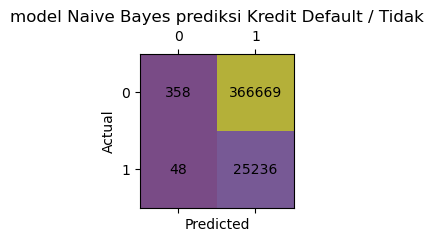

In [22]:
visualCM(y_test, y_pred, 2, "model Naive Bayes prediksi Kredit Default / Tidak")

In [23]:
confusion_matrix(y_test,y_pred)

array([[   358, 366669],
       [    48,  25236]], dtype=int64)

# Test Accuracy Score

In [24]:
y_test.value_counts()

1.0    367027
2.0     25284
Name: TARGET, dtype: int64

In [25]:
null_accuracy = (379791/(379791+27481))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9325


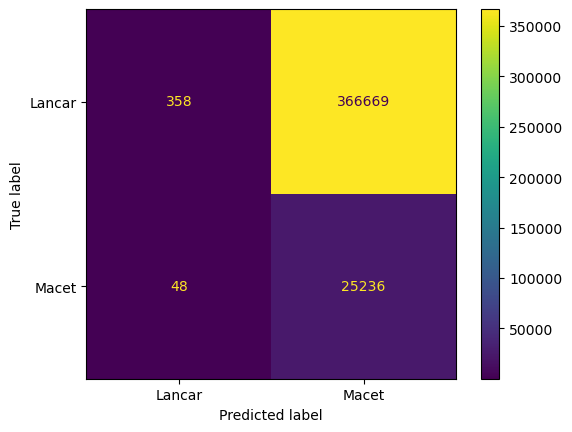

In [26]:
labels = ["Lancar", "Macet"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [28]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[   358 366669]
 [    48  25236]]

True Positives(TP) =  358

True Negatives(TN) =  25236

False Positives(FP) =  366669

False Negatives(FN) =  48
